# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam

### Importing the dataset

In [2]:
dataset = pd.read_excel('P_Dataset4.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Explosive type          588 non-null    object 
 1   Explosive mass          588 non-null    float64
 2   Standoff distance       588 non-null    float64
 3   Peak incident pressure  588 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.5+ KB


In [3]:
# convert categorical variable into dummy variables
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Explosive mass                588 non-null    float64
 1   Standoff distance             588 non-null    float64
 2   Peak incident pressure        588 non-null    float64
 3   Explosive type_Composition B  588 non-null    uint8  
 4   Explosive type_TNT            588 non-null    uint8  
dtypes: float64(3), uint8(2)
memory usage: 15.1 KB


In [4]:
y = dataset[('Peak incident pressure')]
X = dataset.drop('Peak incident pressure', axis=1)
print(X.shape, y.shape)

(588, 4) (588,)


In [5]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 71)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 71)

### Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:2] = sc.fit_transform(X_train[:, 0:2])
print (X_train)

[[ 0.55550177 -0.22203742  1.          0.        ]
 [-0.64547091  0.27937676  1.          0.        ]
 [ 0.36587451  0.78079094  1.          0.        ]
 ...
 [-1.15114363  0.44651482  0.          1.        ]
 [-1.53039816  0.1122387   0.          1.        ]
 [-0.39263456 -1.39200384  0.          1.        ]]


In [9]:
X_test[:,0:2] = sc.transform(X_test[:, 0:2])
print (X_test)

[[-1.53039816 -0.22203742  1.          0.        ]
 [-0.39263456 -0.22203742  1.          0.        ]
 [-0.1397982  -1.39200384  1.          0.        ]
 [-0.64547091 -1.05772772  1.          0.        ]
 [ 0.61871086  0.1122387   0.          1.        ]
 [ 1.5668472  -0.05489936  1.          0.        ]
 [-0.39263456 -1.5591419   1.          0.        ]
 [ 0.61871086  0.27937676  0.          1.        ]
 [ 0.87154722  0.1122387   0.          1.        ]
 [-0.39263456 -0.89058966  0.          1.        ]
 [-0.64547091  1.53291221  0.          1.        ]
 [ 0.87154722 -0.89058966  0.          1.        ]
 [-1.40397998 -1.05772772  1.          0.        ]
 [-1.40397998  0.27937676  1.          0.        ]
 [ 0.80833813 -1.5591419   1.          0.        ]
 [-0.89830727 -0.7234516   0.          1.        ]
 [ 0.80833813 -0.7234516   1.          0.        ]
 [-0.1397982  -0.55631354  1.          0.        ]
 [-0.39263456 -0.05489936  1.          0.        ]
 [-0.64547091 -1.5591419   1.  

In [10]:
X_val[:,0:2] = sc.transform(X_val[:, 0:2])
print (X_val)

[[ 0.55550177  1.53291221  1.          0.        ]
 [-0.39263456 -0.38917548  1.          0.        ]
 [-0.89830727  0.27937676  1.          0.        ]
 [-1.53039816  1.28220512  1.          0.        ]
 [-0.39263456 -1.05772772  0.          1.        ]
 [-1.40397998 -0.05489936  1.          0.        ]
 [-1.40397998 -0.89058966  0.          1.        ]
 [-1.53039816  1.53291221  1.          0.        ]
 [ 0.55550177  0.1122387   1.          0.        ]
 [-1.53039816 -0.7234516   1.          0.        ]
 [-1.40397998  0.78079094  1.          0.        ]
 [-1.53039816  1.53291221  0.          1.        ]
 [-0.1397982  -1.64271093  1.          0.        ]
 [-1.15114363  0.27937676  1.          0.        ]
 [-0.64547091 -0.55631354  0.          1.        ]
 [ 0.80833813  1.11506706  1.          0.        ]
 [ 0.04982906 -0.05489936  1.          0.        ]
 [-0.39263456 -1.22486578  1.          0.        ]
 [-1.40397998  0.44651482  0.          1.        ]
 [-0.64547091 -1.22486578  1.  

# Part 2 - Building the ANN

### Initializing the ANN

In [11]:
# Set seed for NumPy
np.random.seed(71)

# Set seed for TensorFlow
tf.random.set_seed(71)

ann = Sequential()

### Adding the input layer and the first hidden layer

In [12]:
ann.add(Dense(units=60,
              input_shape=(X_train.shape[1],),
              activation='relu'))
ann.add(Dropout(0.1))

### Adding the second hidden layer

In [13]:
ann.add(Dense(units=75,
              activation='relu'))
ann.add(Dropout(0.1))

### Adding the third hidden layer

In [14]:
ann.add(Dense(units=90,
              activation='relu'))
ann.add(Dropout(0.1))

### Adding the output layer

In [15]:
ann.add(Dense(units=1,
              activation='linear'))

### what model looks like

In [16]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                300       
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 75)                4575      
                                                                 
 dropout_1 (Dropout)         (None, 75)                0         
                                                                 
 dense_2 (Dense)             (None, 90)                6840      
                                                                 
 dropout_2 (Dropout)         (None, 90)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

# Part 3 - Training the ANN

### Compiling the ANN

In [17]:
opt = Nadam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [18]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [19]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=400,
                    batch_size=50,
                    verbose=1,
                    callbacks=[es])              

Epoch 1/400
9/9 [==============================] - 2s 43ms/step - loss: 1610987.7500 - mae: 476.5714 - val_loss: 2580498.2500 - val_mae: 619.5517
Epoch 2/400
9/9 [==============================] - 0s 11ms/step - loss: 1400637.6250 - mae: 406.3236 - val_loss: 1925642.8750 - val_mae: 647.0798
Epoch 3/400
9/9 [==============================] - 0s 10ms/step - loss: 1103079.5000 - mae: 533.1621 - val_loss: 1567772.1250 - val_mae: 658.1373
Epoch 4/400
9/9 [==============================] - 0s 8ms/step - loss: 1003540.9375 - mae: 527.6693 - val_loss: 1467461.5000 - val_mae: 585.7687
Epoch 5/400
9/9 [==============================] - 0s 12ms/step - loss: 884888.9375 - mae: 443.9561 - val_loss: 1296055.1250 - val_mae: 580.4880
Epoch 6/400
9/9 [==============================] - 0s 12ms/step - loss: 750006.0625 - mae: 427.3767 - val_loss: 1095021.6250 - val_mae: 571.5469
Epoch 7/400
9/9 [==============================] - 0s 12ms/step - loss: 667874.8750 - mae: 371.2115 - val_loss: 966131.2500 - v

### Analyse learn history

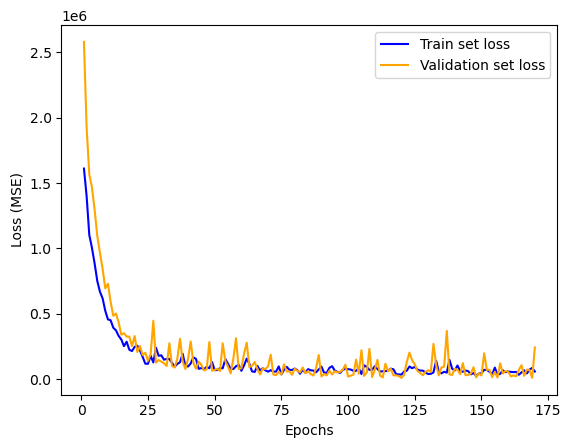

In [20]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

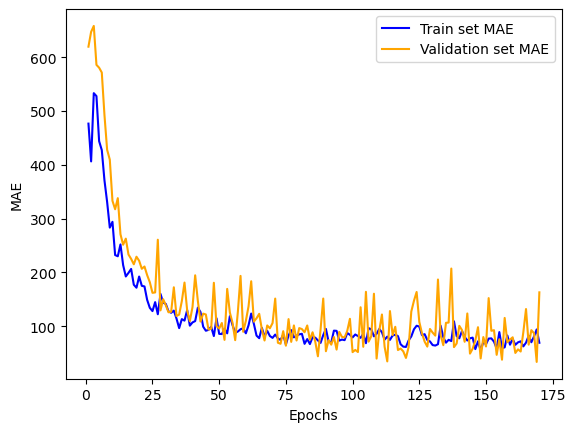

In [21]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
print (epochs)

# Part 4 - Make predictions

3/3 [==============================] - 0s 0s/step


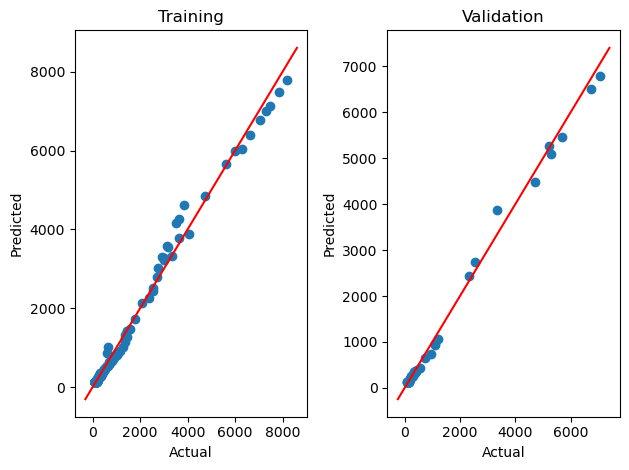

In [22]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [23]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 8ms/step
[[ 120.77  108.55]
 [ 133.68  136.37]
 [ 681.85  861.55]
 [ 242.36  226.66]
 [ 141.43  135.55]
 [ 137.81  153.07]
 [2194.79 2259.19]
 [ 135.78  131.08]
 [ 141.59  137.71]
 [ 198.39  193.11]
 [ 120.77  110.35]
 [ 239.38  254.6 ]
 [ 136.37  145.07]
 [ 120.77  109.74]
 [3920.37 3402.07]
 [ 136.21  148.55]
 [ 196.53  212.03]
 [ 153.84  160.9 ]
 [ 131.13  130.95]
 [1829.14 1939.25]
 [ 130.14  127.54]
 [ 550.41  626.02]
 [ 127.91  126.05]
 [ 124.64  118.59]
 [ 120.77  116.22]
 [ 496.19  591.28]
 [ 120.77  112.12]
 [ 129.63  137.57]
 [ 137.8   135.68]
 [ 120.77  111.11]
 [ 130.36  132.34]
 [ 127.32  123.17]
 [ 124.61  119.91]
 [ 120.77  115.39]
 [ 501.85  565.36]
 [ 127.17  123.17]
 [ 143.13  157.24]
 [ 136.1   134.7 ]
 [4389.32 3652.34]
 [ 139.91  167.83]
 [6234.94 6379.69]
 [ 120.77  115.35]
 [1187.29 1285.73]
 [ 191.17  195.43]
 [ 127.8   127.15]
 [ 120.77  103.39]
 [ 196.41  225.43]
 [ 120.77  116.89]
 [ 132.57  132.34]
 [ 134.07  134.2 ]

Text(0, 0.5, 'Predicted data')

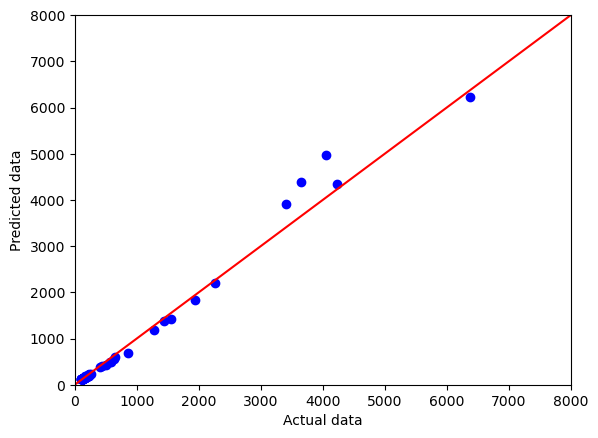

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,8000],[0,8000], color = "red")
plt.axis ([0,8000,0,8000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

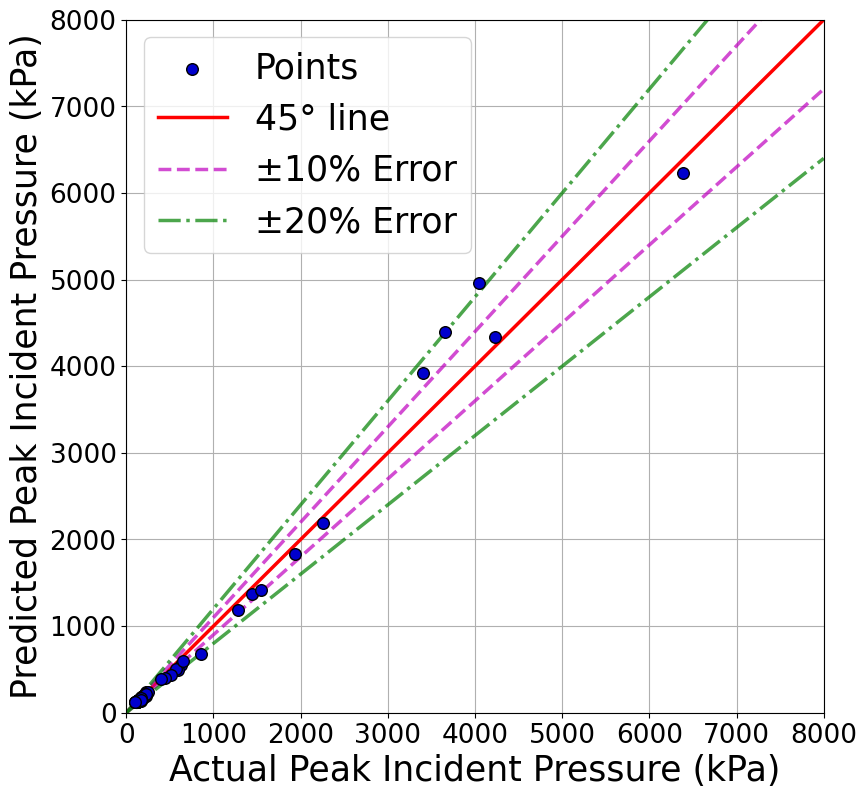

In [25]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,8000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 8000)
plt.xlim(0, 8000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

In [26]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

13/13 [==============================] - 0s 3ms/step
33.38138249182039
45.69658213823297


In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9813375782910883


In [28]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9936139605783209


In [29]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 76.40%
Within 20% margin 96.63%
Out of 20% margin 3.37%


In [30]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9804488915430448


In [31]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

142.29766245058462

In [32]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

45.69658213823297